# 3. 머신러닝 프로젝트 진행과정

---

## 학습 목표
- 머신러닝 프로젝트 수행하기 위해서 그 진행 과정을 학습합니다.
- 머신러닝 모델 선택에 앞서 데이터를 분석하고 정제하는 방법을 학습합니다.

---

## 목차

### 2. 탐색적 데이터 분석
1. 데이터 확인
2. 데이터 정제
3. 특성 엔지니어링
4. 상관 관계 분석


---

## 2-4. 상관 관계 분석

탐색적 데이터 분석 과정의 마지막으로 데이터 간의 상관 관계를 시각화 하여 분석하는 **상관 관계 분석**을 통하여 머신 러닝 모델 선택의 방향을 제시합니다.

특성 엔지니어링을 수행하기 앞서, `train.csv` 를 불러와 데이터 정제를 수행하겠습니다.

`cabin` 변수는 전체 삭제하고, `age` 데이터는 부분 삭제를 수행합니다. 

In [1]:
import pandas as pd

titanic = pd.read_csv('./train.csv')

titanic.drop(['Cabin'], axis='columns', inplace=True)

titanic.dropna(inplace=True)

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### 히스토그램 비교

만약 titanic 데이터들에서 생존 여부(1: 생존, 0: 사망)와 다른 변수들의 연관성을 찾고 싶다고 가정합시다.

이런 경우에는 두 변수를 표현하는 히스토그램 그래프를 그려 판단합니다.

In [2]:
def bar_chart(feature):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

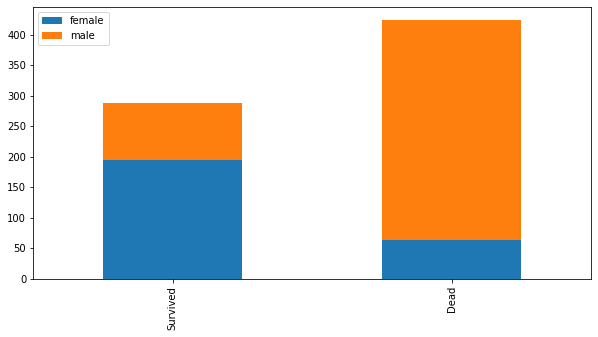

In [3]:
bar_chart('Sex')

`Sex` 데이터의 경우에는 `male`이 비교적 많이 사망한 것을 알 수 있습니다.

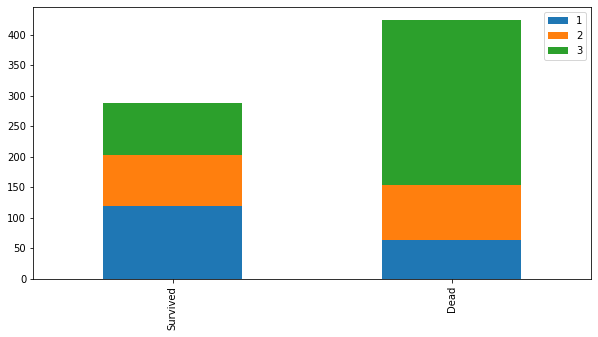

In [4]:
bar_chart('Pclass')

`Pclass` 데이터의 경우에는 `3`이 비교적 많이 사망한 것을 알 수 있습니다.

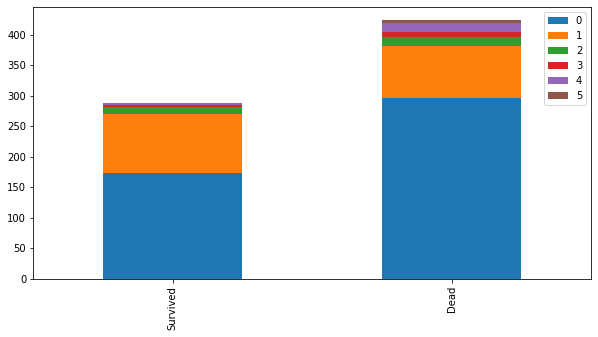

In [5]:
bar_chart('SibSp')

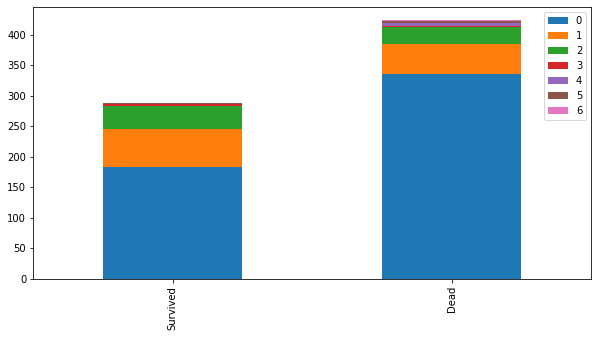

In [6]:
bar_chart('Parch')

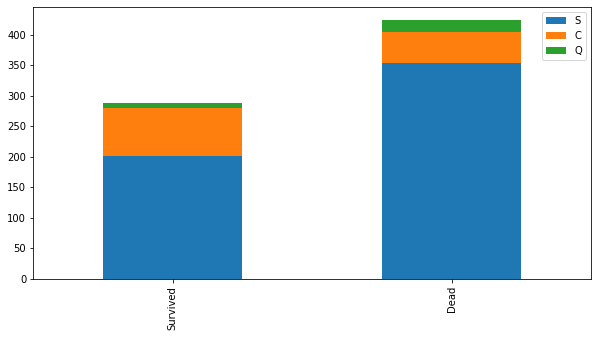

In [7]:
bar_chart('Embarked')

`SibSp`, `Parch`, `Embarked`은 Survived와 Dead 쪽에 거의 같은 분포로 데이터가 존재하기에 큰 의미가 있어보이진 않습니다.

이렇게 2개의 변수 간의 그래프를 출력하여 `Survived` 와 다른 feature 간의 관계를 알 수 있습니다. 

#### `pairplot`

이번엔 seborn의 `pairplot` 함수를 사용하여3개의 변수에 대해서 상관 관계를 출력해 봅시다.

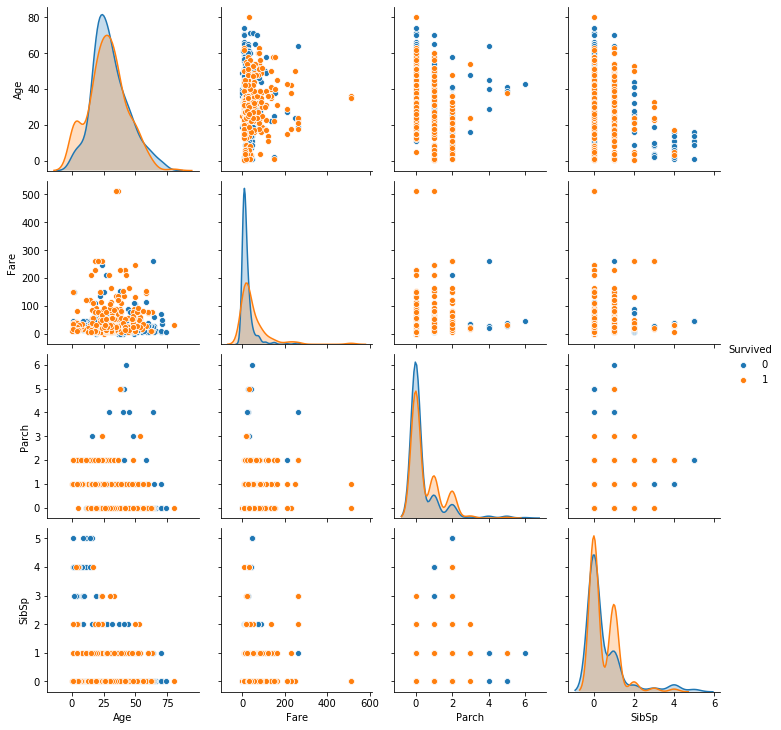

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

# sns.pairplot(dataframe, hue, x_vars, y_vars)
sns.pairplot(titanic[['Age', 'Fare', 'Parch', 'SibSp', 'Survived']], hue='Survived', 
             x_vars=['Age','Fare','Parch','SibSp'], y_vars=['Age','Fare','Parch','SibSp'])
plt.show()


Seaborn의 `pairplot` 함수는 3개의 변수에 대한 그래프를 그리는데 사용되는 함수입니다.

`sns.pairplot(dataframe, hue, x_vars, y_vars)`
- dataframe: feature로 이루어진 column으로 DataFrame 
- hue: 다른 색으로 구분할 feature
- x_vars: x축의 라벨
- y_vars: y축의 라벨

reference : https://seaborn.pydata.org/generated/seaborn.pairplot.html

#### 피어슨 상관 계수

이번에는 확률 통계에서 배웠던 피어슨 상관 계수를 사용하여 변수 간의 상관 관계를 분석해 봅시다.

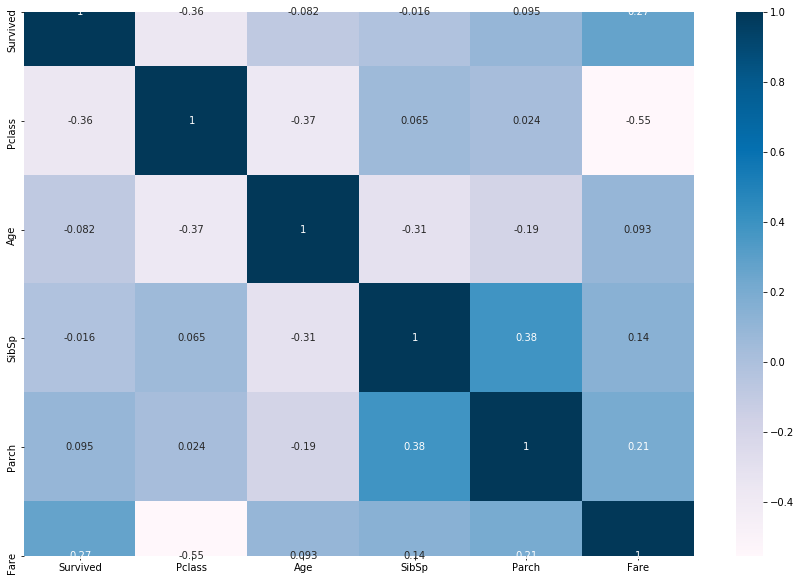

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(titanic.drop('PassengerId',axis=1).corr(), annot=True, cmap='PuBu')
plt.show()

위 그래프는 피어슨 상관 계수를 heatmap 그래프로 표현한 것을 나타냅니다.

`sns.heatmap(data, annot, cmap)`
- data: 2D 데이터
- annot: 2D 데이터 값 그래프에 표시 여부
- cmap: 컬러맵

실제 피어슨 상관 계수를 구하는 방법은 DataFrame에 `.corr()` 함수를 사용하여 구합니다.

In [14]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


피어슨 상관 계수는 각 변수의 분포가 얼마나 비슷한지를 나타내기에 각 변수 간의 관계를 알 수 있습니다.

우리는 이러한 변수 간의 상관 관계를 분석한 후, 머신러닝 학습 모델을 선택하게 됩니다.

아직은 다양한 머신 러닝 모델들을 배우지 않아서 어떤 모델을 선택해야할 지 기준을 세우기 어렵지만 각 머신 러닝 모델들의 장단점과 적용 가능한 데이터에 대한 지식이 많을수록 상관 관계 분석 후 모델 선택의 폭과 성능을 높일 수 있는 모델을 고를 확률이 높아집니다.

---